In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [5]:
img = image.load_img(r"C:\Users\DEVADATH A R\Desktop\Forest Fire Detection\Training and Validation\fire\fire_0463.jpg")


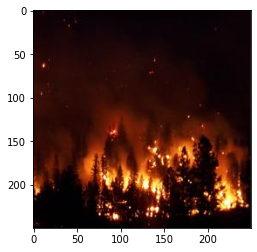

In [6]:
plt.imshow(img)


In [7]:
cv2.imread(r"C:\Users\DEVADATH A R\Desktop\Forest Fire Detection\Training and Validation\fire\fire_0463.jpg")

array([[[24, 20, 31],
        [24, 20, 31],
        [24, 20, 32],
        ...,
        [23, 19, 30],
        [25, 21, 32],
        [40, 36, 47]],

       [[10,  6, 17],
        [10,  6, 17],
        [10,  6, 18],
        ...,
        [ 9,  5, 16],
        [ 1,  0,  8],
        [17, 13, 24]],

       [[ 5,  1, 13],
        [ 5,  1, 13],
        [ 5,  1, 13],
        ...,
        [ 4,  0, 11],
        [ 8,  4, 15],
        [23, 19, 30]],

       ...,

       [[18, 18, 30],
        [ 0,  0,  8],
        [ 0,  0,  8],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [18, 18, 18]],

       [[ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [19, 19, 19]],

       [[ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  0,  1],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [19, 19, 19]]], dtype=uint8)

In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset = train.flow_from_directory(r"C:\Users\DEVADATH A R\Desktop\Forest Fire Detection\Training and Validation",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')

validation_dataset = train.flow_from_directory(r"C:\Users\DEVADATH A R\Desktop\Forest Fire Detection\Training and Validation",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')


Found 1832 images belonging to 2 classes.
Found 1832 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [12]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    
])


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics = ['accuracy'])

c:\Users\DEVADATH A R\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=50,
                      validation_data= validation_dataset)


Epoch 1/50
5/5 [==============================] - 14s 3s/step - loss: 4.1608 - accuracy: 0.6400 - val_loss: 1.4918 - val_accuracy: 0.4940
Epoch 2/50
5/5 [==============================] - 11s 3s/step - loss: 0.8573 - accuracy: 0.6000 - val_loss: 0.3417 - val_accuracy: 0.8581
Epoch 3/50
5/5 [==============================] - 12s 3s/step - loss: 0.5065 - accuracy: 0.8000 - val_loss: 0.6354 - val_accuracy: 0.7156
Epoch 4/50
5/5 [==============================] - 12s 3s/step - loss: 0.5548 - accuracy: 0.7600 - val_loss: 0.7481 - val_accuracy: 0.6714
Epoch 5/50
5/5 [==============================] - 11s 3s/step - loss: 0.4754 - accuracy: 0.7600 - val_loss: 0.3245 - val_accuracy: 0.8646
Epoch 6/50
5/5 [==============================] - 11s 3s/step - loss: 0.3378 - accuracy: 0.9200 - val_loss: 0.3378 - val_accuracy: 0.8324
Epoch 7/50
5/5 [==============================] - 11s 3s/step - loss: 0.3534 - accuracy: 0.8000 - val_loss: 0.3169 - val_accuracy: 0.8575
Epoch 8/50
5/5 [==================

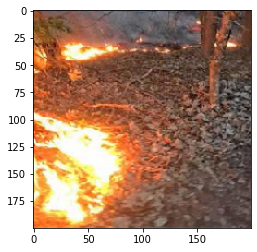

Fire


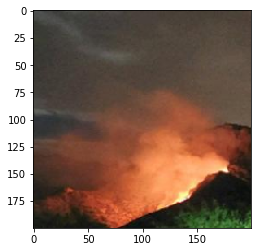

Fire


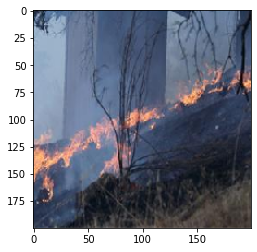

No Fire


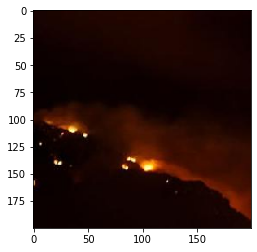

Fire


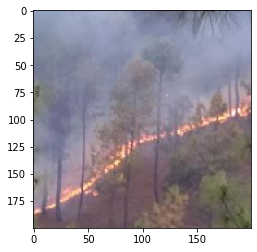

No Fire


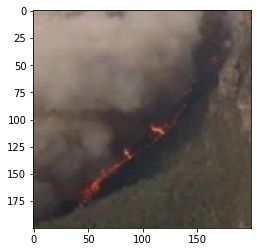

No Fire


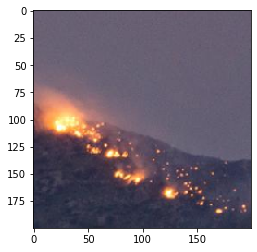

Fire


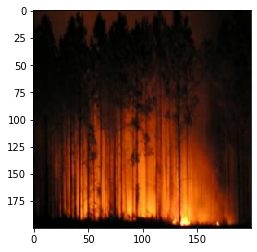

Fire


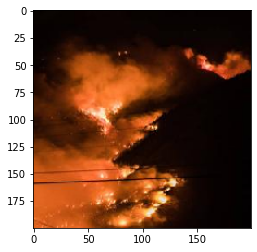

Fire


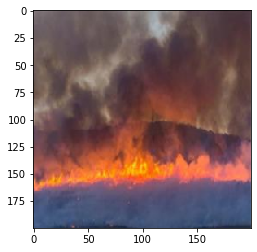

Fire


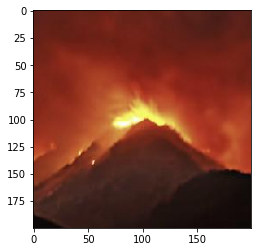

Fire


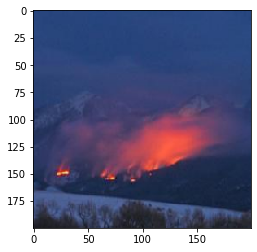

No Fire


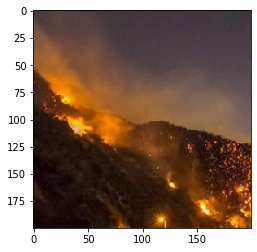

Fire


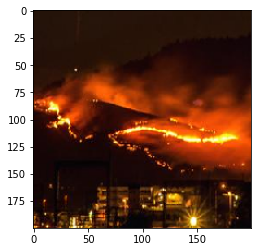

Fire


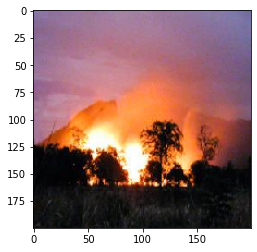

Fire


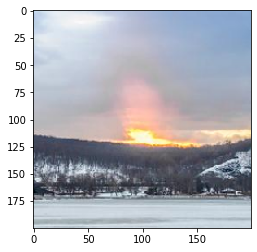

No Fire


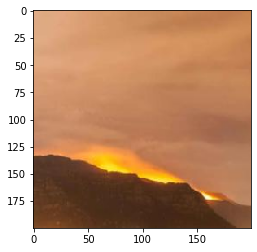

Fire


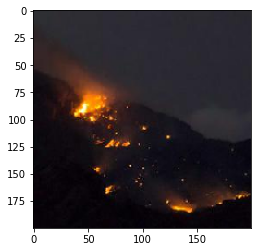

Fire


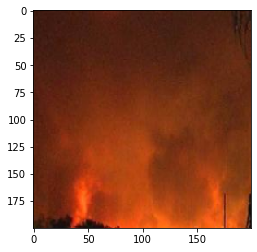

Fire


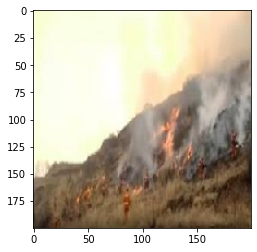

No Fire


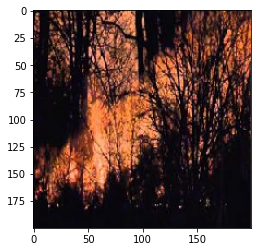

No Fire


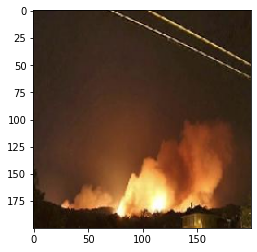

Fire


In [26]:
dir_path =r"C:\Users\DEVADATH A R\Desktop\forest_fire\Testing\fire" 
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("Fire")
  else:
    print("No Fire")
